In [ ]:
from google.colab import files
uploaded=files.upload()

Saving diabetes.csv to diabetes (1).csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from sklearn.linear_model import LogisticRegression
import io

In [ ]:
df=pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Data cleaning, preprocessing

Removing noisy datas

In [ ]:
df[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [ ]:
df['Glucose'].replace({0:round(df['Glucose'].mean(),2)},inplace=True)

In [ ]:
df.loc[75:]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,120.89,48,20,0,24.7,0.140,22,0
76,7,62.00,78,0,0,32.6,0.391,41,0
77,5,95.00,72,33,0,37.7,0.370,27,0
78,0,131.00,0,0,0,43.2,0.270,26,1
79,2,112.00,66,22,0,25.0,0.307,24,0
...,...,...,...,...,...,...,...,...,...
763,10,101.00,76,48,180,32.9,0.171,63,0
764,2,122.00,70,27,0,36.8,0.340,27,0
765,5,121.00,72,23,112,26.2,0.245,30,0
766,1,126.00,60,0,0,30.1,0.349,47,1


In [ ]:
df['BloodPressure'].replace({0:round(df['BloodPressure'].mean(),2)},inplace=True)

In [ ]:
df['SkinThickness'].replace({0:round(df['SkinThickness'].mean(),2)},inplace=True)

In [ ]:
df['Insulin'].replace({0:round(df['Insulin'].mean(),2)},inplace=True)

In [ ]:
df['BMI'].replace({0:round(df['BMI'].mean(),2)},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


# Data Exploration


Finding correlation of every pair of features (and the outcome variable), and visualize the correlations using a heatmap.


 

                          Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.127964  ...  0.544341  0.221898
Glucose                      0.127964  1.000000  ...  0.266600  0.492908
BloodPressure                0.208983  0.219665  ...  0.326738  0.162991
SkinThickness                0.013403  0.160783  ...  0.026462  0.175047
Insulin                     -0.018082  0.396598  ...  0.038653  0.179186
BMI                          0.021546  0.231480  ...  0.025749  0.312256
DiabetesPedigreeFunction    -0.033523  0.137107  ...  0.033561  0.173844
Age                          0.544341  0.266600  ...  1.000000  0.238356
Outcome                      0.221898  0.492908  ...  0.238356  1.000000

[9 rows x 9 columns]


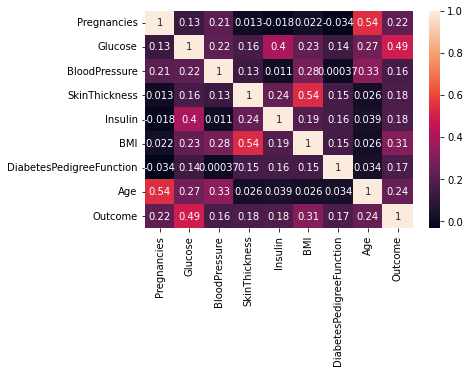

In [ ]:
corr = df.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns,
         annot=True)

In the above heatmap, brighter colors indicate more correlation. Glucose levels, age, BMI and number of pregnancies all have significant correlation with the outcome variable. Also notice the correlation between pairs of features, like age and pregnancies, or BMI and skin thickness.

# Data Preperation(spliting and Normalization)

The data set consists of record of 767 patients in total. To train - 667records. 100 records for testing.

In [ ]:
dfTrain = df[:667]
dfTest = df[667:]


Separate the label and features (for both training and test dataset).Convert them into NumPy arrays as the machine learning algorithm process data in NumPy array format.

In [ ]:
trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome',1))
testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop('Outcome',1))

Normalize the data such that each variable has 0 mean and standard deviation of 1.Standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais.

In [ ]:
#splitting
dfTrain = df[:667]
dfTest = df[667:]
#seperate label features
trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome',1))
testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop('Outcome',1))
#Normalization
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
trainData = (trainData - means)/stds
testData = (testData - means)/stds

In [ ]:
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
trainData = (trainData - means)/stds
testData = (testData - means)/stds

In [ ]:
trainData

array([[ 6.56098425e-01,  8.79140941e-01, -9.75918587e-04, ...,
         1.93847753e-01,  4.37697182e-01,  1.45472123e+00],
       [-8.33992338e-01, -1.18269683e+00, -5.07103909e-01, ...,
        -8.19033971e-01, -3.75884898e-01, -1.75421878e-01],
       [ 1.25213473e+00,  2.02460637e+00, -6.75813239e-01, ...,
        -1.29653535e+00,  5.70346435e-01, -8.96248720e-02],
       ...,
       [-1.13201049e+00,  1.89369604e+00, -1.85677855e+00, ...,
         8.01576787e-01, -6.93177375e-02, -9.47594928e-01],
       [ 2.14618919e+00,  4.86409937e-01,  1.01128006e+00, ...,
        -5.73048409e-01, -6.44131164e-01,  7.68345184e-01],
       [-1.13201049e+00, -4.62689991e-01, -1.01323190e+00, ...,
        -8.47973449e-01, -1.01849683e+00, -8.61797922e-01]])

# Training and Evaluating ML model

In [ ]:
model = LogisticRegression()
model.fit(trainData, trainLabel)

LogisticRegression()

In [ ]:

model.predict(testData)

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
predictions = model.predict(testData)

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(testLabel, predictions)
print(cm)

[[57  6]
 [15 23]]


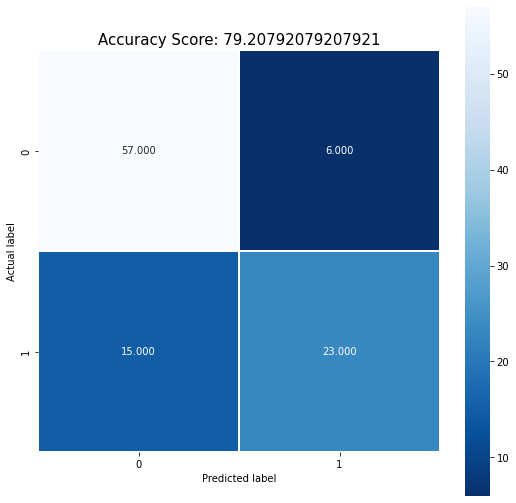

In [ ]:
model = LogisticRegression()
model.fit(trainData, trainLabel)

from sklearn import metrics
cm = metrics.confusion_matrix(testLabel, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(model.score(testData, testLabel)*100)
plt.title(all_sample_title, size = 15);

In [ ]:
accuracy = model.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  79.20792079207921 %


In [ ]:
lab=df.drop(columns=['Outcome'])
lab.columns.to_list()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

Visualization of the weights in the Logistic Regression model corresponding to each of the feature variables

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00,79.8,33.6,0.627,50,1
1,1,85.0,66.0,29.00,79.8,26.6,0.351,31,0
2,8,183.0,64.0,20.54,79.8,23.3,0.672,32,1
3,1,89.0,66.0,23.00,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.00,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.00,79.8,36.8,0.340,27,0
765,5,121.0,72.0,23.00,112.0,26.2,0.245,30,0
766,1,126.0,60.0,20.54,79.8,30.1,0.349,47,1


Text(0.5, 0, 'Importance')

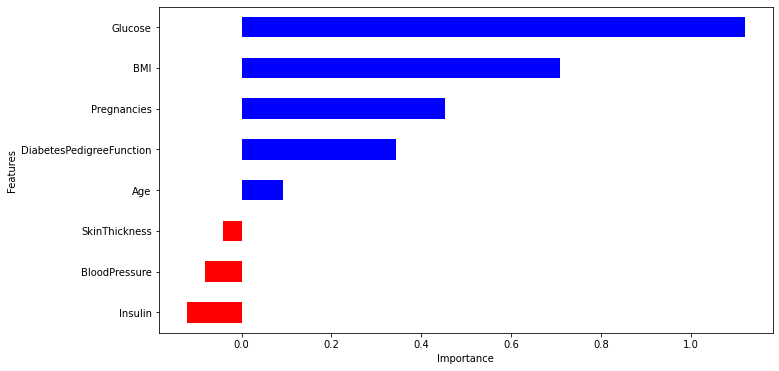

In [ ]:
coeff = list(model.coef_[0])
labels = list(lab.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

# Prediction

In [ ]:
dfCheck

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
750,4,136.0,70.0,20.54,79.8,31.2,1.182,22,1
751,1,121.0,78.0,39.00,74.0,39.0,0.261,28,0
752,3,108.0,62.0,24.00,79.8,26.0,0.223,25,0
753,0,181.0,88.0,44.00,510.0,43.3,0.222,26,1
754,8,154.0,78.0,32.00,79.8,32.4,0.443,45,1
755,1,128.0,88.0,39.00,110.0,36.5,1.057,37,1
756,7,137.0,90.0,41.00,79.8,32.0,0.391,39,0
757,0,123.0,72.0,20.54,79.8,36.3,0.258,52,1
758,1,106.0,76.0,20.54,79.8,37.5,0.197,26,0
759,6,190.0,92.0,20.54,79.8,35.5,0.278,66,1


In [ ]:
sampleData = dfCheck[:1]
# prepare sample after standardising
sampleDataFeatures = np.asarray(sampleData.drop('Outcome',1))
sampleDataFeatures = (sampleDataFeatures - means)/stds


In [ ]:
# predict
predictionProbability = model.predict_proba(sampleDataFeatures)
prediction = model.predict(sampleDataFeatures)
print('Probability:', predictionProbability)
print('prediction:', prediction)

Probability: [[0. 1.]]
prediction: [1]
